# Support Vector Regressor

Support Vector Machines (SVMs) are a type of supervised machine learning model which uses a hyperplane in the feature space, which in case of classification acts as a boundary, and in case of regression acts as the best-fit line. In SVM, a Kernel function is generally used to transform the dataset, so that a non-linear decision surface is able to transform to a linear equation in a higher number of dimension spaces. 

A **Support Vector Regressor (SVR)** is a type of SVM, to find the best fit line (which in the case of SVM is a hyperplane) that has the maximum number of data points.

### Importing the dataset

We start by loading dataset as pandas dataframe object

In [1]:
import pandas as pd
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


From the dataset, we take 'Level' column as input `X`, and 'Salary' column as output `y`, and plot their shapes.

In [2]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1:].values

print(X.shape, y.shape)

(10, 1) (10, 1)


We plot the Position (X-axis) against Salary (Y-axis).

In [3]:
import matplotlib.pyplot as plt

plt.plot(X, y)
plt.title('Position - Salary')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.ticklabel_format(style='plain')
plt.show()

<Figure size 640x480 with 1 Axes>

### Splitting the dataset into the Training set and Test set

To ensure the model does not overfit on the whole dataset, we split the model into training set (80% of the dataset used for training) and testing set (20% of the dataset used for testing). 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8, 1) (2, 1) (8, 1) (2, 1)


### Feature Scaling

We use Standardisation of the features for scaling.

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

y = sc_y.fit_transform(y)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

### Implementing SVR 

We implement the SVR model using RBF Kernel, and fit to the training dataset.

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train[:,0])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting a new result

We predict the salary for a single position input value, in this case we take 6.5 as the position. For the model output, we inverse scale the value.

In [7]:
y_pred = regressor.predict([[6.5]])
y_pred = sc_y.inverse_transform(y_pred)
print(y_pred)

[236394.16026647]


### Visualising the SVR results on Test set

We plot the actual and predicted Salary for the input Position values from the testing dataset

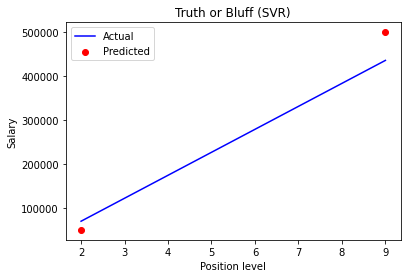

In [8]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

X_test = sc_X.inverse_transform(X_test)
y_test = sc_y.inverse_transform(y_test)

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.legend(['Actual', 'Predicted'])
plt.show()

### Visualising the SVR results on full dataset

We now plot the Salary vs Position for the whole dataset. We first create a grid from X in order to get a smooth curve.

In [9]:
import numpy as np
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape(-1, 1)
y_pred = regressor.predict(X_grid)
y_pred = sc_y.inverse_transform(y_pred)

X = sc_X.inverse_transform(X)
X_grid = sc_X.inverse_transform(X_grid)
y = sc_y.inverse_transform(y)

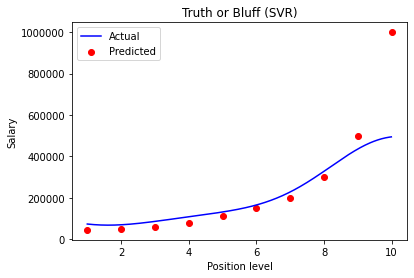

In [10]:
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, y_pred, color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.ticklabel_format(style='plain')
plt.legend(['Actual', 'Predicted'])
plt.show()

We can see the model can fit most of the data points.